In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline

In [24]:
df = pd.read_feather("results/cleaned_df.feather")

In [25]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5030,562,Germany,Male,33,8,11.436694,2,1,0,7.211741,0
8863,687,Spain,Male,38,8,11.148152,2,1,1,11.106176,1
5037,606,Spain,Male,38,7,11.764303,1,1,1,12.174992,0
2885,660,Spain,Male,42,5,0.000000,2,1,0,11.657117,0
3642,778,France,Male,42,6,0.000000,2,1,1,11.573065,0


In [26]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,7.441327,1.530200,11.208386
std,96.653299,10.487806,2.892174,5.606400,0.581654,1.000216
min,350.000000,18.000000,0.000000,0.000000,1.000000,2.532108
25%,584.000000,32.000000,3.000000,0.000000,1.000000,10.839642
50%,652.000000,37.000000,5.000000,11.484521,1.000000,11.514873
75%,718.000000,44.000000,7.000000,11.757010,2.000000,11.914311
max,850.000000,92.000000,10.000000,12.432806,4.000000,12.206040


Note that only 20% of the customers have exited. This suggests an unbalanced dataset.

In [27]:
y = df.loc[:, "Exited"]
X = df.drop('Exited', 1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

## Exploratory Data Analysis

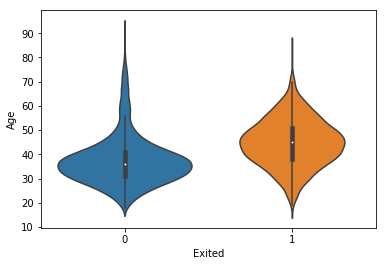

In [17]:
sns.violinplot(x = "Exited", y = "Age", data = df)

The population of exiters (Excited = 1) is older than the population of remainers.

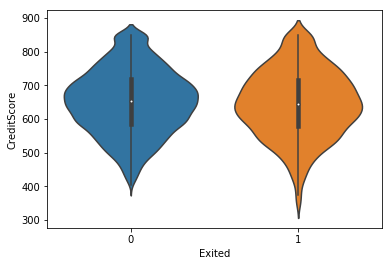

In [18]:
sns.violinplot(x = "Exited", y = "CreditScore", data = df)

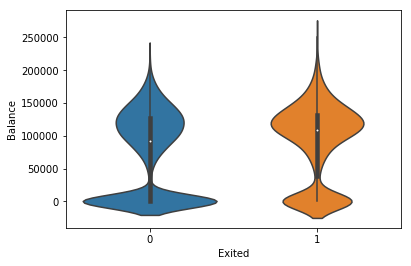

In [19]:
sns.violinplot(x = "Exited", y = "Balance", data = df)

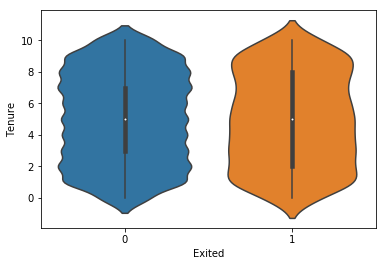

In [20]:
sns.violinplot(x = "Exited", y = "Tenure", data = df)

In [ ]:
g = sns.factorplot(x="class", y="", hue="Exited", data=df,
size=6, kind="bar", palette="muted")

In [21]:
??sns.factorplot

## Logistic Regression

First, I'm going to determine which coefficients survive an increasingly strong L1 weight.

In [12]:


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

ValueError: could not convert string to float: 'Female'